# wykonaj implementację funkcji plot_state_borders(), ale dla kraju innego niż USA,należy pamiętać o aktualizacji współrzędnych geograficznych  

In [3]:
from collections import Counter
import math, random
import matplotlib.pyplot as plt
import re
from linear_algebra import distance


cities = [(-114.491928,60.792196,'Python'),(-114.997299,60.792196,'Python'),(-111.840279,56.712446,'Java'),(-110.653756,56.397591,'Java'),(-125.781929,54.701245,'R'),(-122.167427,54.324961,'R'),(-86.776228,53.859015,'Python'),(-114.161200,53.360807,'Python'),(-105.470372,50.234226, 'Java'),(-97.911778,49.526299, 'Java'),(-106.261387,57.611007, 'R'),(-96.373692,56.681296, 'R')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]


segments = []
points = []

lat_long_regex = "<point lat=\"(.*)\" lng=\"(.*)\""

with open("newCanada.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))
        

def plot_state_borders(plt, color='0.8'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)

def knn_classify(k, labeled_points, new_point):
    """each labeled point should be a pair (point, label)"""

    # order the labeled points from nearest to farthest
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))

    # find the labels for the k closest
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # and let them vote
    return majority_vote(k_nearest_labels)

def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

# key is language, value is pair (longitudes, latitudes)
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

# we want each language to have a different marker and color
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=10)

plot_state_borders(plt)    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location


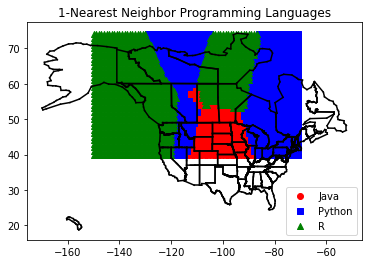

In [3]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=1
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

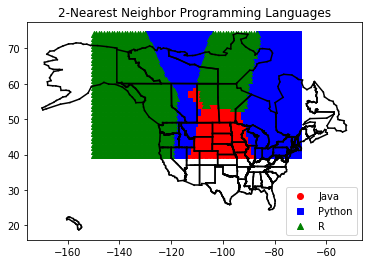

In [4]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=2
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

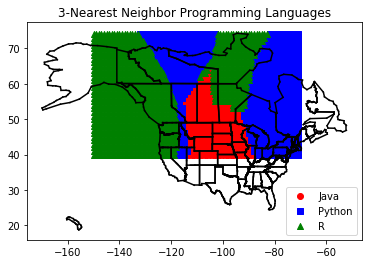

In [5]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=3
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

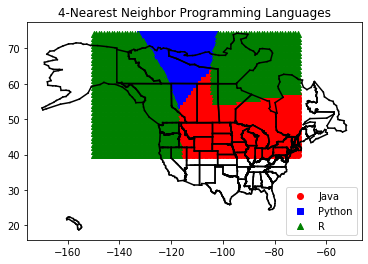

In [6]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=4
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

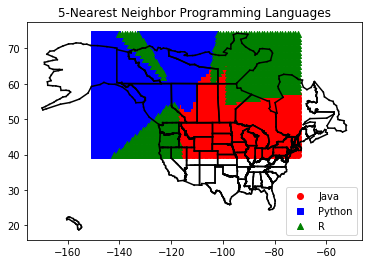

In [7]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=5
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

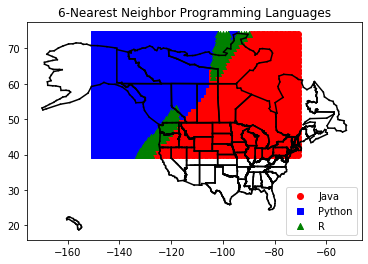

In [8]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=6
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

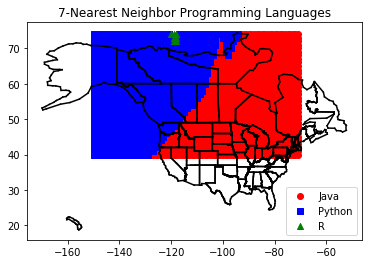

In [9]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=7
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

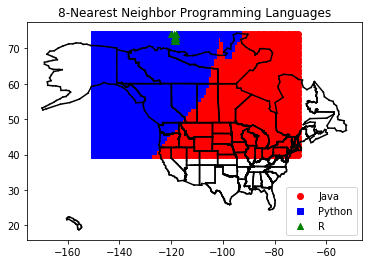

In [10]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=8
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

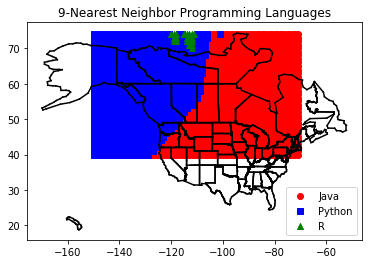

In [11]:
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

k=9
for longitude in range(-150, -70):
    for latitude in range(40, 75):
        predicted_language = knn_classify(k, cities, [longitude, latitude])
        plots[predicted_language][0].append(longitude)
        plots[predicted_language][1].append(latitude)

# create a scatter series for each language
for language, (x, y) in plots.items():
    plt.scatter(x, y, color=colors[language], marker=markers[language],
                      label=language, zorder=0)

plot_state_borders(plt, color='black')    # assume we have a function that does this

plt.legend(loc=0)          # let matplotlib choose the location
plt.title(str(k) + "-Nearest Neighbor Programming Languages")
plt.show()

In [ ]:
from stats import mean
import math, random
import matplotlib.pyplot as plt

def random_point(dim):
    return [random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]


dimensions = range(1, 300)

avg_distances = []
min_distances = []

random.seed(0)
list1 = list()
list2 = list()
list3 = list()
list4 = list()

for dim in dimensions:
    distances = random_distances(dim, 10000)  # 10,000 random pairs
    avg_distances.append(mean(distances))     # track the average
    min_distances.append(min(distances))      # track the minimum
    list1.append(dim)
    list2.append(mean(distances))
    list3.append(min(distances))
    
plt.plot(list1, list2)
plt.plot(list1, list3)
plt.show()

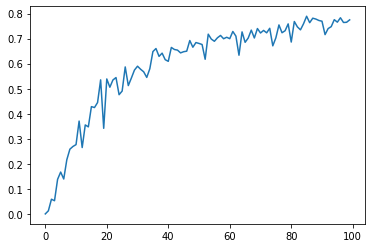

In [10]:
min_avg_ratio = [min_dist / avg_dist for min_dist, avg_dist in zip(min_distances, avg_distances)]
plt.plot(min_avg_ratio)
plt.show()

In [ ]:
print(distance)